In [130]:
import numpy as np
import pandas as pd
import tensorflow as tf
import math
import matplotlib.pyplot as plt
%matplotlib inline
file=pd.read_csv('Dataset for Detection of Cyber-Trolls.csv')
file

,Tweets,Label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19995,I dont. But what is complaining about it goi...,0
19996,Bahah yeah i&;m totally just gonna&; get pis...,0
19997,hahahahaha >:) im evil mwahahahahahahahahaha,0
19998,What&;s something unique about Ohio? :),0


In [3]:
file.shape

(20000, 2)

In [4]:
file.Label.value_counts()

0    12178
1     7822
Name: Label, dtype: int64

In [28]:
import re
import string
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', str(text))
    return text_nopunct
file['Cleaned_Tweets'] = file['Tweets'].apply(lambda x: remove_punct(x))
file.head()

,Tweets,Label,Cleaned_Tweets,Tokenized,tokens_lowered,Text_Final,Filtered_words
0,Get fucking real dude.,1,Get fucking real dude,Get fucking real dude,"[get, fucking, real, dude]",get fucking real dude,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,She is as dirty as they come and that crook ...,She is as dirty as they come and that crook Re...,"[she, is, as, dirty, as, they, come, and, that...",dirty come crook rengel dems fucking corrupt j...,"[dirty, come, crook, rengel, dems, fucking, co..."
2,why did you fuck it up. I could do it all day...,1,why did you fuck it up I could do it all day ...,why did you fuck it up I could do it all day t...,"[why, did, you, fuck, it, up, i, could, do, it...",fuck could day lets hour ping later sched writ...,"[fuck, could, day, lets, hour, ping, later, sc..."
3,Dude they dont finish enclosing the fucking s...,1,Dude they dont finish enclosing the fucking s...,Dude they dont finish enclosing the fucking sh...,"[dude, they, dont, finish, enclosing, the, fuc...",dude dont finish enclosing fucking showers hat...,"[dude, dont, finish, enclosing, fucking, showe..."
4,WTF are you talking about Men? No men thats n...,1,WTF are you talking about Men No men thats no...,WTF are you talking about Men No men thats not...,"[wtf, are, you, talking, about, men, no, men, ...",wtf talking men men thats menage thats gay,"[wtf, talking, men, men, thats, menage, thats,..."


In [6]:
from nltk import word_tokenize

In [23]:
tokens = file['Cleaned_Tweets'].map(word_tokenize)
file['Tokenized'] = [' '.join(t) for t in tokens]
tokens

0                               [Get, fucking, real, dude]
1        [She, is, as, dirty, as, they, come, and, that...
2        [why, did, you, fuck, it, up, I, could, do, it...
3        [Dude, they, dont, finish, enclosing, the, fuc...
4        [WTF, are, you, talking, about, Men, No, men, ...
                               ...                        
19995    [I, dont, But, what, is, complaining, about, i...
19996    [Bahah, yeah, im, totally, just, gon, na, get,...
19997        [hahahahaha, im, evil, mwahahahahahahahahaha]
19998              [Whats, something, unique, about, Ohio]
19999         [Who, is, the, biggest, gossiper, you, know]
Name: Cleaned_Tweets, Length: 20000, dtype: object

In [8]:
def lower_token(tokens): 
    return [word.lower() for word in tokens]    
    
tokens_lowered=[lower_token(t) for t in tokens]
file['tokens_lowered']=tokens_lowered
file.head()

,Tweets,Label,Cleaned_Tweets,Tokenized,tokens_lowered
0,Get fucking real dude.,1,Get fucking real dude,Get fucking real dude,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,She is as dirty as they come and that crook ...,She is as dirty as they come and that crook Re...,"[she, is, as, dirty, as, they, come, and, that..."
2,why did you fuck it up. I could do it all day...,1,why did you fuck it up I could do it all day ...,why did you fuck it up I could do it all day t...,"[why, did, you, fuck, it, up, i, could, do, it..."
3,Dude they dont finish enclosing the fucking s...,1,Dude they dont finish enclosing the fucking s...,Dude they dont finish enclosing the fucking sh...,"[dude, they, dont, finish, enclosing, the, fuc..."
4,WTF are you talking about Men? No men thats n...,1,WTF are you talking about Men No men thats no...,WTF are you talking about Men No men thats not...,"[wtf, are, you, talking, about, men, no, men, ..."


In [9]:
from nltk.corpus import stopwords

stoplist=stopwords.words('english')
def removeStopWords(tokens): 
    return [w for w in tokens if w not in stoplist]
def removenumeric(tokens):
    return [w for w in tokens if not w.isdigit()]
filtered_words=[removeStopWords(t) for t in tokens_lowered]
filtered_words=[removenumeric(t) for t in filtered_words]
file['Text_Final'] = [' '.join(t) for t in filtered_words]
file['Filtered_words'] = filtered_words
file.head(8)

,Tweets,Label,Cleaned_Tweets,Tokenized,tokens_lowered,Text_Final,Filtered_words
0,Get fucking real dude.,1,Get fucking real dude,Get fucking real dude,"[get, fucking, real, dude]",get fucking real dude,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,She is as dirty as they come and that crook ...,She is as dirty as they come and that crook Re...,"[she, is, as, dirty, as, they, come, and, that...",dirty come crook rengel dems fucking corrupt j...,"[dirty, come, crook, rengel, dems, fucking, co..."
2,why did you fuck it up. I could do it all day...,1,why did you fuck it up I could do it all day ...,why did you fuck it up I could do it all day t...,"[why, did, you, fuck, it, up, i, could, do, it...",fuck could day lets hour ping later sched writ...,"[fuck, could, day, lets, hour, ping, later, sc..."
3,Dude they dont finish enclosing the fucking s...,1,Dude they dont finish enclosing the fucking s...,Dude they dont finish enclosing the fucking sh...,"[dude, they, dont, finish, enclosing, the, fuc...",dude dont finish enclosing fucking showers hat...,"[dude, dont, finish, enclosing, fucking, showe..."
4,WTF are you talking about Men? No men thats n...,1,WTF are you talking about Men No men thats no...,WTF are you talking about Men No men thats not...,"[wtf, are, you, talking, about, men, no, men, ...",wtf talking men men thats menage thats gay,"[wtf, talking, men, men, thats, menage, thats,..."
5,Ill save you the trouble sister. Here comes a ...,1,Ill save you the trouble sister Here comes a b...,Ill save you the trouble sister Here comes a b...,"[ill, save, you, the, trouble, sister, here, c...",ill save trouble sister comes big ol fuck fran...,"[ill, save, trouble, sister, comes, big, ol, f..."
6,Im dead serious.Real athletes never cheat don...,1,Im dead seriousReal athletes never cheat dont...,Im dead seriousReal athletes never cheat dont ...,"[im, dead, seriousreal, athletes, never, cheat...",im dead seriousreal athletes never cheat dont ...,"[im, dead, seriousreal, athletes, never, cheat..."
7,...go absolutely insane.hate to be the bearer ...,1,go absolutely insanehate to be the bearer of b...,go absolutely insanehate to be the bearer of b...,"[go, absolutely, insanehate, to, be, the, bear...",go absolutely insanehate bearer bad newsloldon...,"[go, absolutely, insanehate, bearer, bad, news..."


In [10]:
file.to_csv('preprocessing.csv')

In [11]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(file['Text_Final'], file['Label'], shuffle=True, test_size=0.2)

# find the length of the largest sentence in training data
training_sentence_lengths = [len(tokens) for tokens in xtrain]
print("Max sentence length in train is %s" % max(training_sentence_lengths))
max_len=max(training_sentence_lengths)
# find the length of the largest sentence in testing data
test_sentence_lengths = [len(tokens) for tokens in xtest]
print("Max sentence length in test is %s" % max(test_sentence_lengths))

Max sentence length in train is 904
Max sentence length in test is 667


In [40]:
from tensorflow.keras.preprocessing import text, sequence 

max_words = 10000
tokenizer = text.Tokenizer(num_words = max_words)

# create the vocabulary by fitting on x_train text
tokenizer.fit_on_texts(xtrain)
# generate the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(xtrain)
xtest_seq = tokenizer.texts_to_sequences(xtest)

# pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq)
xtest_pad = sequence.pad_sequences(xtest_seq)
word_index = tokenizer.word_index
len(xtrain_pad[6])#len=142

142

In [13]:
#load the Glove Vectors
embedding_vectors = {}
with open('glove.twitter.27B.100d.txt','r',encoding='utf-8') as glove_file:
    for row in glove_file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
#print(f"Size of vocabulary in GloVe: {len(embedding_vectors)}")   
#len(embedding_vectors)

In [57]:
emb_dim = 100
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)+1
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_words.append(word)
#print some of the out of vocabulary words
print(oov_words[0:50])

['lt3', '2day', 'nahhh', '2nd', '1st', 'ampamp', 'b4', 'gtlt', 'ummmm', 'kjfuck', '70s', 'heyyy', '3rd', 'ohhhh', 'y0', 'youaposre', '7th', 'damnd', 'httptwitpiccomt9za', 'hmmmi', '80s', 'myzou', 'thunking', 'm3', 'jfish', 'quotkristaquot', 'sucksi', '4am', 'str8', 'favrd', 'yeahhh', '2night', 'jewboy', '17th', 'ewww', 'whittingtons', 'twitpanto', '2b', 'locascio', 'babysinead', 'y0u', 'manthat', 'too3', 'krockxp', 'uhhh', 'xentury', 'v8', 'calamityjen', '11pm', 'ps3']


In [15]:
embedding_matrix[2]

array([ 1.8435e-01,  3.4638e-01,  3.6504e-01,  6.0354e-01, -2.2940e-01,
       -1.0155e-01,  4.6474e-01,  2.8357e-01,  1.9533e-01,  6.3805e-01,
       -2.2669e-02,  2.1714e-01, -4.4768e+00, -2.5935e-01,  6.7712e-01,
       -4.0085e-02, -8.9188e-04, -3.3866e-01, -4.4386e-01, -5.1624e-01,
       -2.7588e-01,  2.2449e-01,  5.8658e-03, -8.5680e-02,  6.8822e-01,
        4.4768e-02, -4.4996e-01, -2.4830e-01, -2.6020e-01, -3.5478e-01,
       -9.5430e-01, -2.3096e-01, -4.5752e-02,  9.0701e-02, -6.2813e-01,
        5.6478e-01, -4.2195e-01,  3.6337e-01,  1.5341e-01,  1.0405e-01,
       -1.1739e+00,  1.0603e-01, -2.6939e-01, -1.8659e-01, -1.3978e-01,
        7.7009e-02,  6.1475e-01,  5.2478e-01,  4.0327e-01,  7.7527e-01,
       -4.6076e-01,  3.6190e-01, -2.5888e-01, -1.0429e-01,  1.9468e-01,
        2.4984e-01, -7.2952e-01, -1.3537e-01,  4.9564e-01, -1.4137e-01,
       -1.5075e-01, -2.2521e-01,  3.6637e-01, -1.9326e-01, -1.5961e-01,
       -2.6602e-01, -2.4458e-01, -2.2380e-02,  1.2608e-01,  2.05

In [16]:
#model LSTM
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout
from tensorflow.keras.models import Sequential

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(64, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(16, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(1, activation = 'sigmoid'))
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 128)         117248    
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 32)          12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 32)          0

In [95]:
batch_size = 64
epochs  = 10
lstm = lstm_model.fit(xtrain_pad, ytrain, validation_data=(xtest_pad, ytest), batch_size = batch_size, epochs = epochs)

Epoch 1/10
250/250 [==============================] - 61s 243ms/step - loss: 0.6706 - accuracy: 0.6087 - val_loss: 0.6680 - val_accuracy: 0.6097
Epoch 2/10
250/250 [==============================] - 64s 255ms/step - loss: 0.6594 - accuracy: 0.6099 - val_loss: 0.6521 - val_accuracy: 0.6260
Epoch 3/10
250/250 [==============================] - 64s 254ms/step - loss: 0.5690 - accuracy: 0.6685 - val_loss: 0.5260 - val_accuracy: 0.7040
Epoch 4/10
250/250 [==============================] - 63s 254ms/step - loss: 0.5068 - accuracy: 0.7358 - val_loss: 0.4756 - val_accuracy: 0.7585
Epoch 5/10
250/250 [==============================] - 63s 253ms/step - loss: 0.4503 - accuracy: 0.7830 - val_loss: 0.4542 - val_accuracy: 0.7812
Epoch 6/10
250/250 [==============================] - 64s 254ms/step - loss: 0.4225 - accuracy: 0.8005 - val_loss: 0.3944 - val_accuracy: 0.8148
Epoch 7/10
250/250 [==============================] - 64s 254ms/step - loss: 0.3081 - accuracy: 0.8745 - val_loss: 0.3978 - val_ac

In [18]:
#model BLSTM
from tensorflow.keras.layers import Bidirectional

blstm_model=Sequential()
blstm_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
blstm_model.add(Bidirectional(LSTM(128, return_sequences=True)))
blstm_model.add(Dropout(0.2))
blstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
blstm_model.add(Dropout(0.2))
blstm_model.add(Bidirectional(LSTM(32, return_sequences=True)))
blstm_model.add(Dropout(0.2))
blstm_model.add(Bidirectional(LSTM(16, return_sequences=False)))
blstm_model.add(Dropout(0.2))
blstm_model.add(Dense(32, activation='relu'))
blstm_model.add(Dropout(0.1))
blstm_model.add(Dense(1,activation='sigmoid'))
blstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(blstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         234496    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         164352    
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 64)          41216     
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 64)         

In [96]:
batch_size = 64
epochs=10
blstm=blstm_model.fit(xtrain_pad, ytrain, validation_data=(xtest_pad, ytest), batch_size = batch_size, epochs = epochs)

Epoch 1/10
250/250 [==============================] - 142s 570ms/step - loss: 0.1684 - accuracy: 0.9394 - val_loss: 0.3474 - val_accuracy: 0.8763
Epoch 2/10
250/250 [==============================] - 143s 570ms/step - loss: 0.1551 - accuracy: 0.9431 - val_loss: 0.3319 - val_accuracy: 0.8852
Epoch 3/10
250/250 [==============================] - 143s 574ms/step - loss: 0.1241 - accuracy: 0.9549 - val_loss: 0.3771 - val_accuracy: 0.8873
Epoch 4/10
250/250 [==============================] - 144s 576ms/step - loss: 0.1157 - accuracy: 0.9595 - val_loss: 0.3411 - val_accuracy: 0.8970
Epoch 5/10
250/250 [==============================] - 144s 576ms/step - loss: 0.1064 - accuracy: 0.9628 - val_loss: 0.3316 - val_accuracy: 0.8980
Epoch 6/10
250/250 [==============================] - 147s 588ms/step - loss: 0.0902 - accuracy: 0.9679 - val_loss: 0.4083 - val_accuracy: 0.8915
Epoch 7/10
250/250 [==============================] - 147s 587ms/step - loss: 0.0833 - accuracy: 0.9705 - val_loss: 0.3614 -

In [59]:
emb_dim = embedding_matrix.shape[1]
gru_model = Sequential()
gru_model.add(Embedding(vocab_len, emb_dim, trainable = False, weights=[embedding_matrix]))
gru_model.add(GRU(128, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(64, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(32, return_sequences=True))
gru_model.add(Dropout(0.2))
gru_model.add(GRU(16, return_sequences=False))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dropout(0.1))
gru_model.add(Dense(1, activation = 'sigmoid'))
gru_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(gru_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
gru (GRU)                    (None, None, 128)         88320     
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, None, 64)          37248     
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 64)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, None, 32)          9408      
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 32)         

In [114]:
batch_size = 64
epochs=10
history_gru=gru_model.fit(xtrain_pad, ytrain, validation_data=(xtest_pad, ytest), batch_size = batch_size, epochs = epochs)

Epoch 1/10
250/250 [==============================] - 65s 242ms/step - loss: 0.5479 - accuracy: 0.7026 - val_loss: 0.5063 - val_accuracy: 0.7377
Epoch 2/10
250/250 [==============================] - 55s 220ms/step - loss: 0.4905 - accuracy: 0.7479 - val_loss: 0.4659 - val_accuracy: 0.7582
Epoch 3/10
250/250 [==============================] - 61s 245ms/step - loss: 0.4701 - accuracy: 0.7691 - val_loss: 0.4559 - val_accuracy: 0.7680
Epoch 4/10
250/250 [==============================] - 59s 234ms/step - loss: 0.4471 - accuracy: 0.7842 - val_loss: 0.4423 - val_accuracy: 0.7830
Epoch 5/10
250/250 [==============================] - 54s 217ms/step - loss: 0.4220 - accuracy: 0.8033 - val_loss: 0.4266 - val_accuracy: 0.7925
Epoch 6/10
250/250 [==============================] - 54s 218ms/step - loss: 0.3924 - accuracy: 0.8239 - val_loss: 0.4184 - val_accuracy: 0.8052
Epoch 7/10
250/250 [==============================] - 56s 224ms/step - loss: 0.3526 - accuracy: 0.8479 - val_loss: 0.3923 - val_ac

In [100]:
def Predict(predict_text):
    predict_text=remove_punct(predict_text)
    predict_text=word_tokenize(predict_text)
    predict_text=lower_token(predict_text)
    predict_text=removeStopWords(predict_text) 
    predict_text=removenumeric(predict_text)
    predict_text=tokenizer.texts_to_sequences(predict_text)
    predict_text=sequence.pad_sequences(predict_text)
    return predict_text
text_to_predict='Fuck Humanity'
predict_text=Predict([text_to_predict])
blstm_model.predict(predict_text)

array([[0.62736666],
       [0.15767515]], dtype=float32)

In [76]:
train_lstm_results=lstm_model.evaluate(xtrain_pad, ytrain, verbose=0, batch_size=64)
test_lstm_results = lstm_model.evaluate(xtest_pad, ytest, verbose=0, batch_size=64)
print(f'Train accuracy: {train_lstm_results[1]*100:0.2f}')
print(f'Test accuracy: {test_lstm_results[1]*100:0.2f}')

Train accuracy: 60.87
Test accuracy: 60.97


In [78]:
train_blstm_results=blstm_model.evaluate(xtrain_pad, ytrain, verbose=0, batch_size=64)
test_blstm_results=blstm_model.evaluate(xtest_pad, ytest, verbose=0, batch_size=64)
print(f'Train accuracy: {train_blstm_results[1]*100:0.2f}')
print(f'Test accuracy: {test_blstm_results[1]*100:0.2f}')

Train accuracy: 95.00
Test accuracy: 86.98


Text(0.5, 1.0, 'Accuracy')

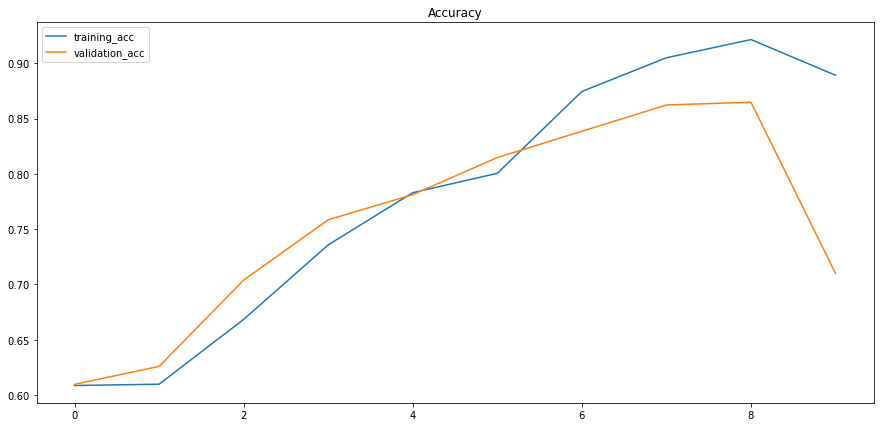

In [110]:
#plot accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(epochs), lstm.history['accuracy'])
plt.plot(range(epochs), lstm.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Accuracy')

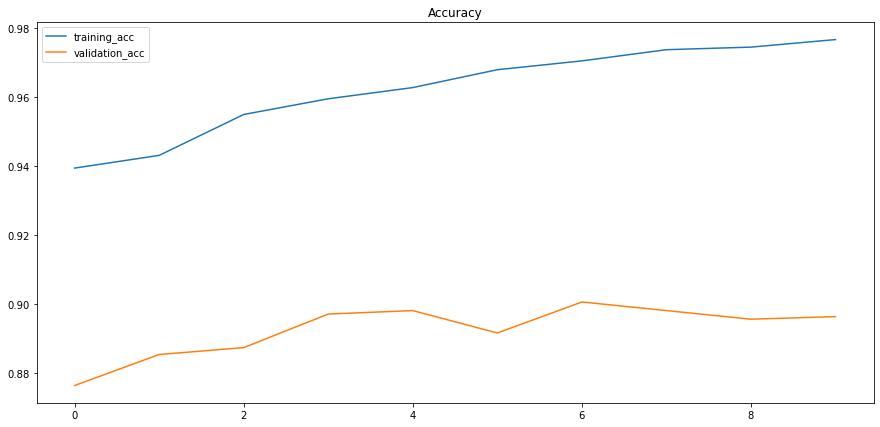

In [112]:
#plot accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(epochs),blstm.history['accuracy'])
plt.plot(range(epochs),blstm.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Accuracy')

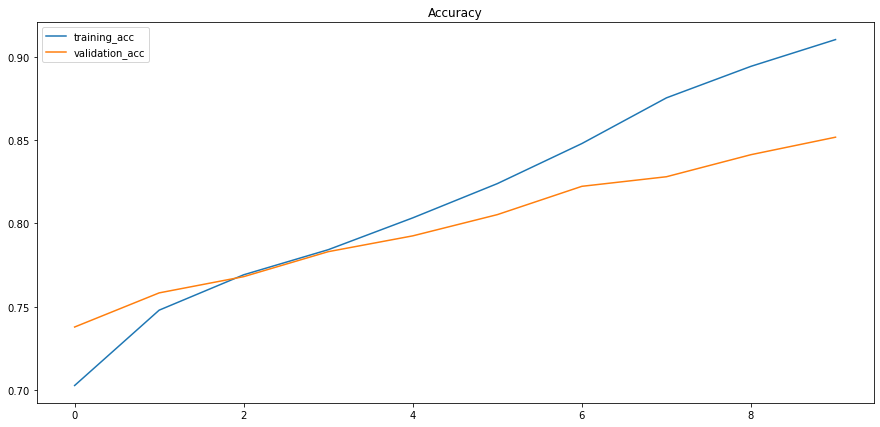

In [116]:
#plot accuracy
plt.figure(figsize=(15, 7))
plt.plot(range(epochs), history_gru.history['accuracy'])
plt.plot(range(epochs), history_gru.history['val_accuracy'])
plt.legend(['training_acc', 'validation_acc'])
plt.title('Accuracy')

Text(69.0, 0.5, 'True')

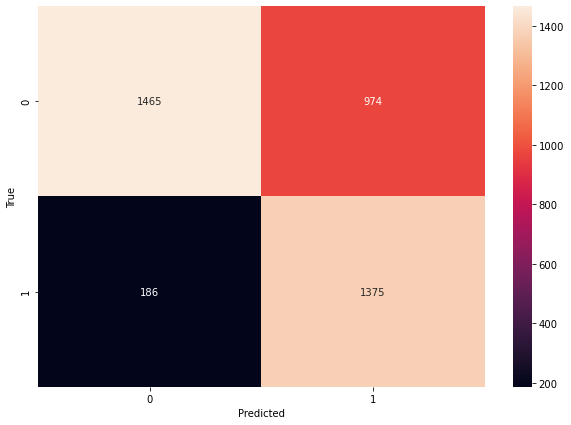

In [127]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

lstm_pred_xtest=np.rint(lstm_model.predict(xtest_pad))
cm=tf.math.confusion_matrix(labels=ytest, predictions=lstm_pred_xtest)
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(69.0, 0.5, 'True')

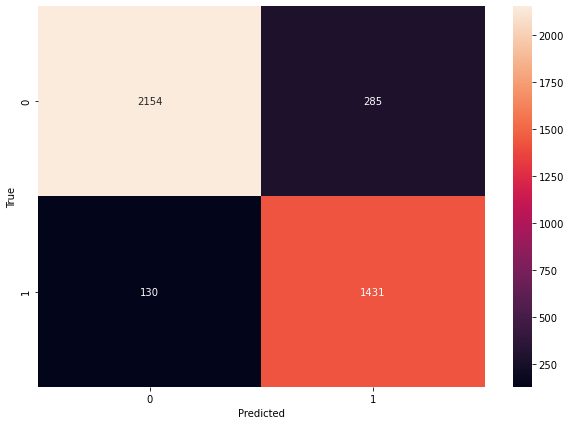

In [128]:
blstm_pred_xtest=np.rint(blstm_model.predict(xtest_pad))
cm=tf.math.confusion_matrix(labels=ytest, predictions=blstm_pred_xtest)
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

Text(69.0, 0.5, 'True')

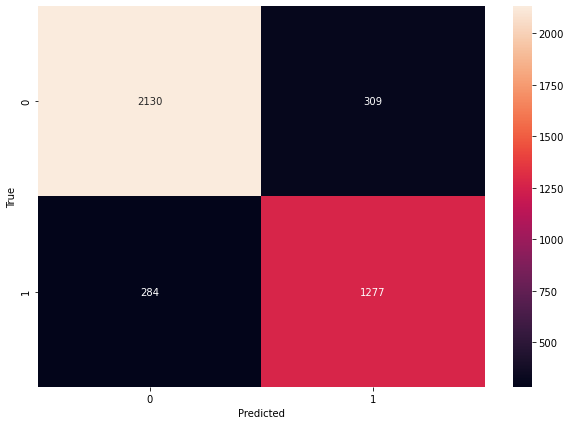

In [129]:
gru_pred_xtest=np.rint(gru_model.predict(xtest_pad))
cm=tf.math.confusion_matrix(labels=ytest, predictions=gru_pred_xtest)
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')